In [24]:
import tensorflow as tf

In [25]:
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

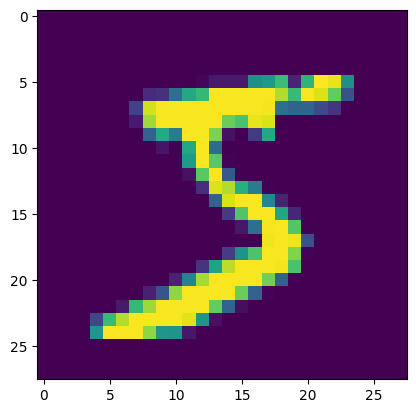

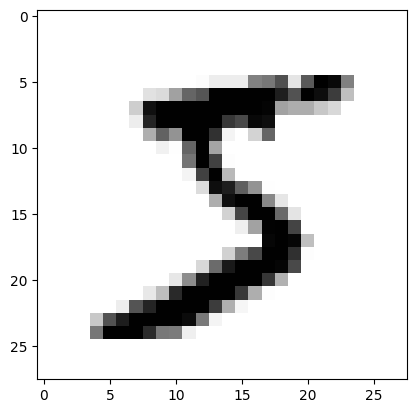

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

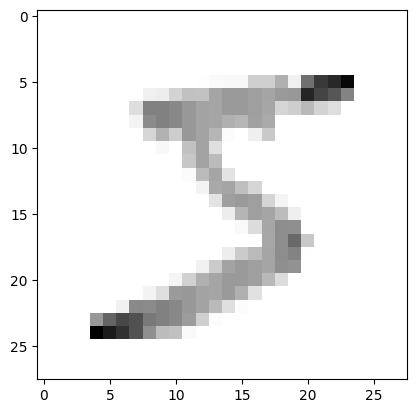

In [29]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [30]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [31]:
print(y_train[0])

5


In [32]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

In [34]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2359552   
                                                      

In [36]:
# compile model that we have created
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [37]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 10 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/10
329/329 [==============================] - 89s 264ms/step - loss: 0.2959 - accuracy: 0.9086 - val_loss: 0.0905 - val_accuracy: 0.9721
Epoch 2/10
329/329 [==============================] - 84s 256ms/step - loss: 0.0934 - accuracy: 0.9709 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 3/10
329/329 [==============================] - 84s 254ms/step - loss: 0.0631 - accuracy: 0.9806 - val_loss: 0.0517 - val_accuracy: 0.9848
Epoch 4/10
329/329 [==============================] - 83s 252ms/step - loss: 0.0498 - accuracy: 0.9838 - val_loss: 0.0472 - val_accuracy: 0.9862
Epoch 5/10
329/329 [==============================] - 87s 264ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0459 - val_accuracy: 0.9858
Epoch 6/10
329/329 [==============================] - 84s 255ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0440 - val_accuracy: 0.9881
Epoch 7/10
329/329 [==============================] - 85s 260ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0463 - val_ac

In [38]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0336 - accuracy: 0.9908
Test loss on 10,000 test samples 0.03360893949866295
Validation Accuracy on 10,000 samples 0.9908000230789185


In [39]:
predictions = model.predict([x_tester])

313/313 [==============================] - 5s 17ms/step


In [40]:
print(np.argmax(predictions[54]))

6


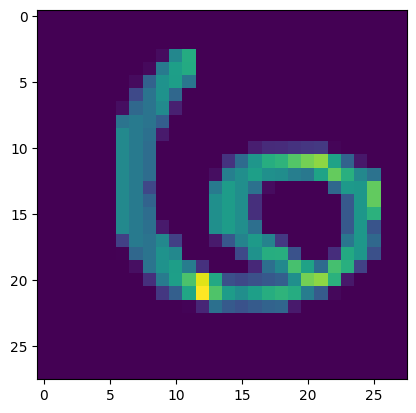

In [41]:
plt.imshow(x_test[54])

In [42]:
model.save("digit_recogniser_model.h5")

In [43]:
import cv2

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

1/1 [==============================] - 0s 180ms/step


In [44]:
print(np.argmax(predictions))

4


In [143]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
from PIL import Image
width = 100  # canvas width
height = 100 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)
def Close():
    root.destroy()

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=100, height=100, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()
image = Image.open('user_input.png')
image.thumbnail((28, 28))
image.save('user_input.png')


In [144]:
try:
    img = cv2.imread("user_input.png")
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
    new_img = tf.keras.utils.normalize(resize, axis=1)
    new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
    predictions = model.predict(new_img)
    print(np.argmax(predictions))
    plt.show()
except:
    print("Error.")

1/1 [==============================] - 0s 36ms/step
4
